## LV_1. 체육복

점심시간에 도둑이 들어, 일부 학생이 체육복을 도난당했습니다. 다행히 여벌 체육복이 있는 학생이 이들에게 체육복을 빌려주려 합니다. 학생들의 번호는 체격 순으로 매겨져 있어, 바로 앞번호의 학생이나 바로 뒷번호의 학생에게만 체육복을 빌려줄 수 있습니다. 예를 들어, 4번 학생은 3번 학생이나 5번 학생에게만 체육복을 빌려줄 수 있습니다. 체육복이 없으면 수업을 들을 수 없기 때문에 체육복을 적절히 빌려 최대한 많은 학생이 체육수업을 들어야 합니다.

전체 학생의 수 n, 체육복을 도난당한 학생들의 번호가 담긴 배열 lost, 여벌의 체육복을 가져온 학생들의 번호가 담긴 배열 reserve가 매개변수로 주어질 때, 체육수업을 들을 수 있는 학생의 최댓값을 return 하도록 solution 함수를 작성해주세요.

### 제한사항

- 전체 학생의 수는 2명 이상 30명 이하입니다.
- 체육복을 도난당한 학생의 수는 1명 이상 n명 이하이고 중복되는 번호는 없습니다.
- 여벌의 체육복을 가져온 학생의 수는 1명 이상 n명 이하이고 중복되는 번호는 없습니다.
- 여벌 체육복이 있는 학생만 다른 학생에게 체육복을 빌려줄 수 있습니다.
- 여벌 체육복을 가져온 학생이 체육복을 도난당했을 수 있습니다. 이때 이 학생은 체육복을 하나만 도난당했다고 가정하며, 남은 체육복이 하나이기에 다른 학생에게는 체육복을 빌려줄 수 없습니다.

### 입출력 예

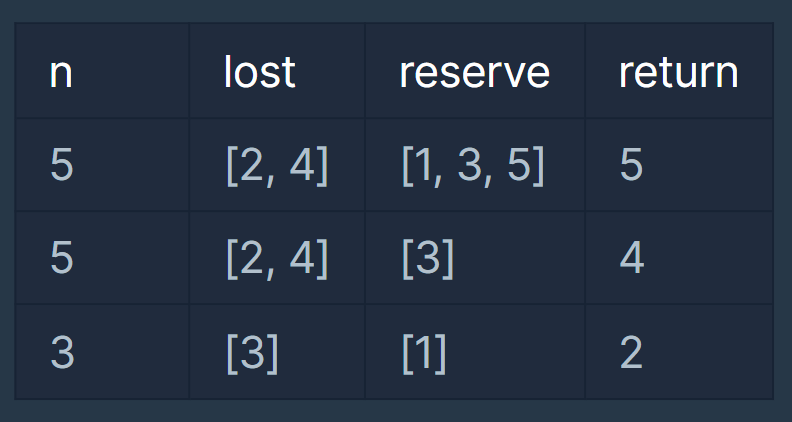

### 예제 #1
1번 학생이 2번 학생에게 체육복을 빌려주고, 3번 학생이나 5번 학생이 4번 학생에게 체육복을 빌려주면 학생 5명이 체육수업을 들을 수 있습니다.

### 예제 #2
3번 학생이 2번 학생이나 4번 학생에게 체육복을 빌려주면 학생 4명이 체육수업을 들을 수 있습니다.

### 내 풀이

In [342]:
n = 5
lost = [2,4]
reserve = [1,3,5]
ret = 5

In [336]:
def solution(n, lost, reserve):
    lost.sort()     # 우선 정렬
    reserve.sort()  # 우선 정렬
    
    
    # 여분을 가져온 학생이 체육복을 도둑맞은 경우를 고려
    new_lost = []
    for i in lost:
        if i in reserve:    # lost의 원소 x가 reserve에 있다면
            reserve.remove(i)
        else:
            new_lost.append(i)
    lost = new_lost

    # 전체 학생수에서 체육복이 없는 학생을 제외
    n -= len(lost)
    
    # 체육복을 빌려줄 수 있는 경우 학생수에 추가
    for i in lost:
        for j in reserve:
            if (i-1 == j) | (i+1 == j):
                reserve.remove(j) # 빌려준 체육복 제거
                n+=1
    
    return n

solution(n, lost, reserve)

5

### 다른 사람 풀이

In [339]:
def solution(n, lost, reserve):
    _reserve = [r for r in reserve if r not in lost]
    _lost = [l for l in lost if l not in reserve]
    for r in _reserve:
        f = r - 1
        b = r + 1
        if f in _lost:
            _lost.remove(f)
        elif b in _lost:
            _lost.remove(b)
    return n - len(_lost)
solution(n, lost, reserve)

5

### 다른 사람 풀이 이해하기

In [345]:
# 코드는 짧고 간략하지만 한 눈에 보고 이해하기가 어렵다...
# 정렬하지 않고 시작하면 테스트케이스 20번을 통과하지 못한다.

def solution(n, lost, reserve):
    reserve = [r for r in reserve if r not in lost] # lost와 reserve가 겹치지 않는 경우만 뽑아 배열 갱신
    lost = [l for l in lost if l not in reserve]
    
    for x in reserve:   # 여분 체육복이 있는 애들 중
        f = x - 1       # 앞번호에 줄 수 있는 경우
        b = x + 1       # 뒷번호에 줄 수 있는 경우
        if f in lost:
            lost.remove(f)
        elif b in lost:
            lost.remove(b)
    return n - len(lost)     # 전체 학생 수에서 체육복이 없거나 빌리지 못한 학생을 제외.

solution(n, lost, reserve)

5